### Phase-space ellipse

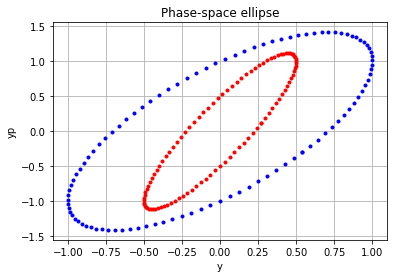

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math 

beta = 1
phi = 1
alpha = 1
delta = np.linspace(0, 2*np.pi, 100) # Generates 30 points between 0 and 2Pi
#a = np.random.normal(0, 0.1, 10)
a = 1
a2 = 0.5

y = np.zeros(len(delta))
yp = np.zeros(len(delta))
y2 = np.zeros(len(delta))
yp2 = np.zeros(len(delta))

fig, ax = plt.subplots()

for i in range(len(delta)):
    y[i] = a*math.sqrt(beta)*math.cos(phi-delta[i])
    yp[i] = -a/math.sqrt(beta)*math.sin(phi-delta[i])+alpha*math.cos(phi-delta[i])
    y2[i] = a2*math.sqrt(beta)*math.cos(phi-delta[i])
    yp2[i] = -a2/math.sqrt(beta)*math.sin(phi-delta[i])+alpha*math.cos(phi-delta[i])
ax.plot(y, yp, linestyle = 'None',marker=".", color="b")
ax.plot(y2, yp2, linestyle = 'None',marker=".", color="r")




ax.set(xlabel='y', ylabel='yp',
       title='Phase-space ellipse')
ax.grid()

plt.show()